# Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset.

In [2]:
df = pd.read_csv("Datasets/FuelConsumption.csv")

# take a look at the dataset using head method.

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# take a look at the last 5 rows of dataset using tail method.

In [4]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


# Summarize the data using (describe) method.

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Select some feature from the dataset and see more .

In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# WE CAN CREATE THE HISTOGRAM PLOT OF ALL FEATURE ONE BY ONE.

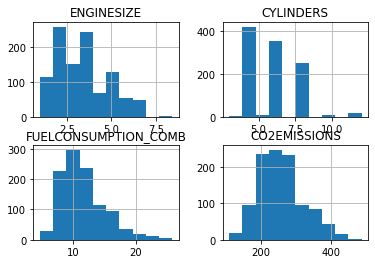

In [7]:
cdf.hist()
plt.show()

# we create a scatter plot of fuelconsumption_comb with co2emission.

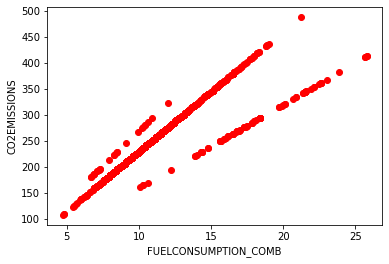

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

# we create a scatter plot of enginesize with co2emission.

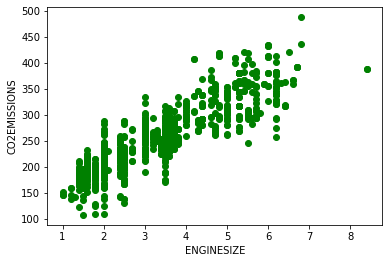

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# we create a scatter plot of cylinders with co2emission.

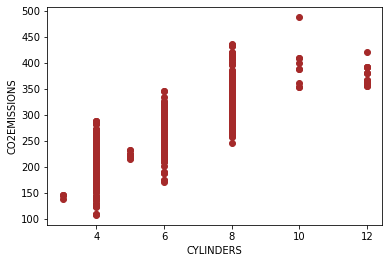

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'brown')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

# we can use np.random.rand() function for select randomly rows to create a mask. 


In [11]:
msk = np.random.rand(len(df)) < 0.8
# select training and testing data.
train = cdf[msk]
test = cdf[~msk]

# Distribution  of Training data  .

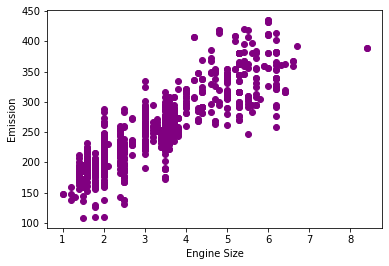

In [16]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='purple')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

# we can use sklearn package for data modelling and we import linear model fromsklearn and we use all function of linear model.

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficients : ', regr.coef_)
print("Intercept : ", regr.intercept_ )

Coefficients :  [[38.90892101]]
Intercept :  [126.55327843]


# we can create fitline for our data.

Text(0, 0.5, 'Emission')

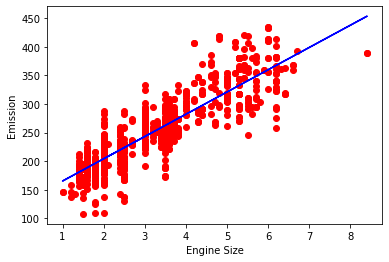

In [34]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-b')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

# we can use Mean Squared Error for check the accuracy of test set.

In [35]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

In [36]:
print("Mean absolute error : %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

Mean absolute error : 21.64


In [37]:
print("Residual sum of squares (MSE) : %.2f" % np.mean(np.absolute(test_y_hat - test_y) ** 2))

Residual sum of squares (MSE) : 766.28


In [38]:
print("R2-SCORE : %.2f" % r2_score(test_y_hat, test_y))

R2-SCORE : 0.75
